# Лабораторная работа №1
## Анализ сходства текстов с помощью расстояния Жаккарда

### Выполнил: Емельянов Андрей Сергеевич гр. 8ПМ21

## Описание задания

**Цель работы**: разработать программу на языке программирования Python, обрабатывающую тексты и определяющая их сходство по расстоянию Жаккарда (Жаккара). Результаты работы оформляются в виде .ipynb файла с markdown-заметками в самом файле. Рекомендуется использовать платформу Anaconda 3 (Jupyter Notebook).

**Входные данные**: 50 текстов объемом от 10 предложений каждое. Сбор данных – автоматизированный или ручной – по желанию студента. Исходные тексты, собранные вручную, должны храниться в файле формата по выбору студента (.csv, .json, .xlsx и т.д.)

**Выходные данные**: тепловая карта сходства (heatmap) текстов 50 на 50.

## Ход работы

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import pymorphy2

### Описание функций и констант

Функции для формирования коллекции терминов, списка имен и матрицы терминов

In [2]:
def get_collection(data):
    dictionary = set(data[0][1])
    for arr in data:
        dictionary = dictionary.union(set(arr[1]))

    return list(dictionary)

def get_names(data):
    names = []
    for arr in data:
        names.append(arr[0])

    return pd.Series(names)

def matrix(data):
    collection = get_collection(data)
    names = get_names(data)
    matrix = []
    for i in range(len(data)):
        matrix.append([])
        for word in collection:
            matrix[i].append(word in data[i][1])

    df = pd.DataFrame(data=matrix, columns=collection, index=names)
    df = df.reindex(sorted(df.columns), axis=1)
    return df

#### Предобработка текста:
* Токенизация
* Удаление потенциальных числовых данных
* Нормализация
* Удаление стоп-слов

In [3]:
def normalize(text):
    tokens = word_tokenize(text, language="russian")
    tokens = [word.lower() for word in tokens if not word in '''!()--–'+=[]{};≥×≤±:'"\,<>./?@#$%^&*_~‘’“”''']
    tokens = [word for word in tokens if word.isalpha()]
    morph = pymorphy2.MorphAnalyzer()
    tokens = [morph.parse(word)[0].normal_form for word in tokens]
    tokens = [word for word in tokens if not word in stopwords.words("russian")]
    
    return tokens

Функция для вычисления расстояния Жаккарда

In [4]:
def metric(series1, series2):
    a = series1.values.tolist().count(True)
    b = series2.values.tolist().count(True)
    c = np.logical_and(series1.values, series2.values).tolist().count(True)
    
    return c/(a+b-c)

### Выполнение задания

Импорт данных

In [5]:
data = pd.read_csv('Harry.csv', index_col=0).values.tolist()

Предобработка данных

In [6]:
for i in range(len(data)):
    data[i][1] = normalize(data[i][1])

Формирование матрицы терминов

In [7]:
m_data = matrix(data)

Инициализация матрицы для тепловой карты

In [8]:
size = len(m_data)

In [9]:
hmap = pd.DataFrame(data = np.empty([size, size]), columns=m_data.index.values, index=m_data.index.values)

Рассчёт весов тепловой карты по расстоянию Жаккарда

In [10]:
for row in hmap.index.values:
    for col in hmap.columns.values:
        hmap.loc[row, col] = metric(m_data.loc[row],m_data.loc[col])

In [11]:
hmap

,Глава 1,Глава 2,Глава 3,Глава 4,Глава 5,Глава 6,Глава 7,Глава 8,Глава 9,Глава 10,...,Глава 41,Глава 42,Глава 43,Глава 44,Глава 45,Глава 46,Глава 47,Глава 48,Глава 49,Глава 50
Глава 1,1.000000,0.171322,0.161236,0.130973,0.171258,0.174956,0.167914,0.175772,0.144088,0.164777,...,0.144996,0.180292,0.160500,0.104167,0.152080,0.169108,0.161419,0.158527,0.143627,0.163875
Глава 2,0.171322,1.000000,0.135509,0.148559,0.147414,0.136300,0.122868,0.154817,0.124539,0.136810,...,0.129664,0.144879,0.134286,0.102532,0.154953,0.140919,0.129216,0.134380,0.139249,0.139496
Глава 3,0.161236,0.135509,1.000000,0.137293,0.166667,0.150557,0.143099,0.163659,0.145886,0.147265,...,0.140068,0.167312,0.156199,0.121924,0.163297,0.163251,0.149336,0.137411,0.141318,0.142857
Глава 4,0.130973,0.148559,0.137293,1.000000,0.154701,0.138185,0.121803,0.151277,0.113208,0.119765,...,0.114027,0.136919,0.116370,0.085262,0.133497,0.131268,0.113848,0.122449,0.115588,0.120521
Глава 5,0.171258,0.147414,0.166667,0.154701,1.000000,0.199480,0.195769,0.201287,0.153383,0.173548,...,0.146506,0.203704,0.168699,0.111528,0.177419,0.193864,0.183297,0.153571,0.160913,0.162031
Глава 6,0.174956,0.136300,0.150557,0.138185,0.199480,1.000000,0.279731,0.239937,0.153412,0.204508,...,0.143475,0.186655,0.224052,0.097573,0.184511,0.223144,0.261416,0.174828,0.194765,0.179130
Глава 7,0.167914,0.122868,0.143099,0.121803,0.195769,0.279731,1.000000,0.233596,0.153622,0.196554,...,0.138443,0.186461,0.234124,0.092426,0.179612,0.205663,0.277724,0.163132,0.191198,0.175424
Глава 8,0.175772,0.154817,0.163659,0.151277,0.201287,0.239937,0.233596,1.000000,0.163669,0.189103,...,0.155409,0.190125,0.207404,0.116328,0.194731,0.217865,0.228300,0.180385,0.200301,0.198385
Глава 9,0.144088,0.124539,0.145886,0.113208,0.153383,0.153412,0.153622,0.163669,1.000000,0.197895,...,0.146796,0.177612,0.177610,0.115265,0.173783,0.172814,0.160072,0.162413,0.156269,0.167790
Глава 10,0.164777,0.136810,0.147265,0.119765,0.173548,0.204508,0.196554,0.189103,0.197895,1.000000,...,0.149526,0.199614,0.192382,0.121287,0.178867,0.200240,0.199247,0.182540,0.186469,0.191214


### Визуализация результатов

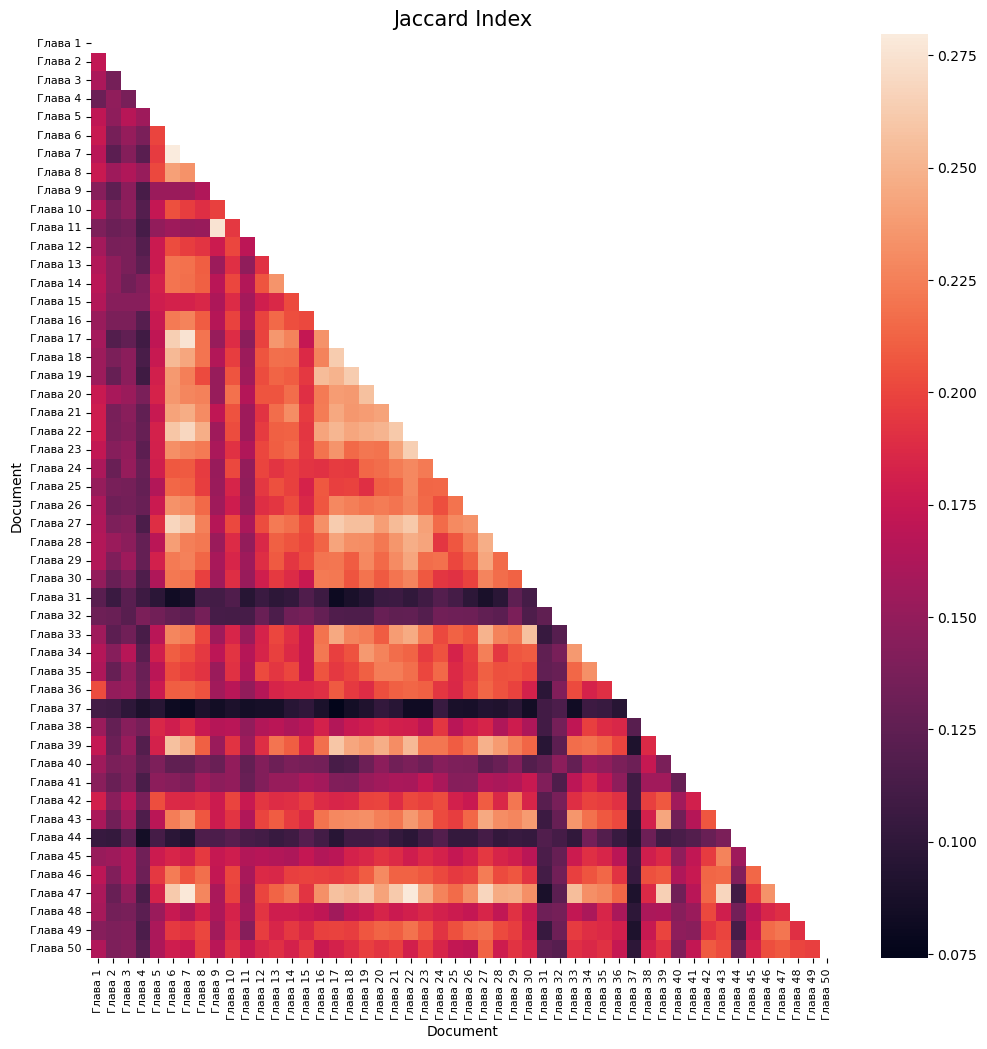

In [12]:
mask = np.triu(np.ones_like(hmap, dtype=bool))
fig, ax = plt.subplots(figsize=(12,12))
fig = sns.heatmap(hmap, mask=mask, xticklabels=True, yticklabels=True, ax=ax)
fig.axes.set_title("Jaccard Index",fontsize=15)
fig.set_xlabel("Document",fontsize=10)
fig.set_ylabel("Document",fontsize=10)
fig.tick_params(labelsize=8)
plt.show()

## Заключение

В ходе данной лабораторной работы были получены навыки:
* Формирования датасета
* Работы с инструментами обработки текстовых данных
* Реализации алгоритмов обработки данных
* Визуализации результатов обработки

Была сформирована тепловая карта корреляции 50 текстов на основе метрики расстояния Жаккарда.